In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal (
mean = [0,3],
cov = [[1,0.5],[0.5,1]],
size=num_samples_per_class)

positive_samples = np.random.multivariate_normal (
mean = [3,0],
cov=[[1,0.5],[0.5,1]],
size = num_samples_per_class)

In [7]:
inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)

In [8]:
targets = np.vstack((np.zeros((num_samples_per_class,1),dtype="float32"),
                    np.ones((num_samples_per_class,1), dtype="float32")))

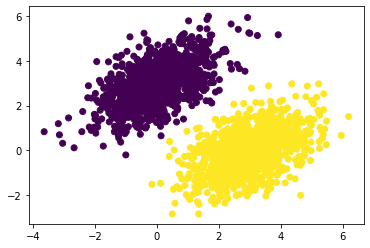

In [11]:
plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])
plt.show()

In [13]:
input_dim=2
output_dim=1
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim,)))

In [14]:
def model (inputs):
    return tf.matmul(inputs, W) + b

In [15]:
def square_loss(targets, predictions) :
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [16]:
learning_rate=0.1

In [18]:
def training_step (inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [19]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"loss at step {step}: {loss:.4f}")

loss at step 0: 5.3910
loss at step 1: 0.3288
loss at step 2: 0.1432
loss at step 3: 0.1139
loss at step 4: 0.1040
loss at step 5: 0.0969
loss at step 6: 0.0906
loss at step 7: 0.0849
loss at step 8: 0.0797
loss at step 9: 0.0750
loss at step 10: 0.0706
loss at step 11: 0.0667
loss at step 12: 0.0630
loss at step 13: 0.0597
loss at step 14: 0.0566
loss at step 15: 0.0538
loss at step 16: 0.0513
loss at step 17: 0.0489
loss at step 18: 0.0468
loss at step 19: 0.0448
loss at step 20: 0.0431
loss at step 21: 0.0414
loss at step 22: 0.0399
loss at step 23: 0.0385
loss at step 24: 0.0373
loss at step 25: 0.0361
loss at step 26: 0.0351
loss at step 27: 0.0341
loss at step 28: 0.0332
loss at step 29: 0.0324
loss at step 30: 0.0317
loss at step 31: 0.0310
loss at step 32: 0.0304
loss at step 33: 0.0298
loss at step 34: 0.0293
loss at step 35: 0.0289
loss at step 36: 0.0284
loss at step 37: 0.0280
loss at step 38: 0.0277
loss at step 39: 0.0273


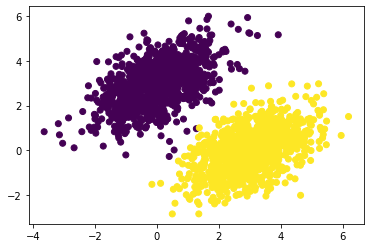

In [20]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()

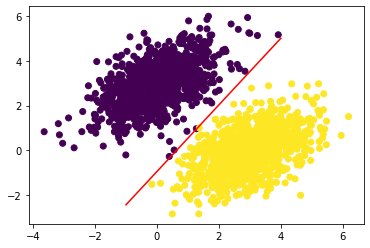

In [21]:
x = np.linspace(-1, 4, 100)
y = -W[0]/ W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)